In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("seismic-bumps.csv")
df.head(5)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


0. seismic: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);

1. seismoacoustic: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method;

2. shift: information about type of a shift (W - coal-getting, N -preparation shift);
   
3. genergy: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall;
    
4. gpuls: a number of pulses recorded within previous shift by GMax;

5. gdenergy: a deviation of energy recorded within previous shift by GMax from average energy recorded during eight previous shifts;
    
6. gdpuls: a deviation of a number of pulses recorded within previous shift by GMax from average number of pulses recorded during eight previous shifts;

7. ghazard: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming form GMax only;

8. nbumps: the number of seismic bumps recorded within previous shift;
    
9. nbumps2: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;

10. nbumps3: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
    
11. nbumps4: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
    
12. nbumps5: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
    
13. nbumps6: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;

14. nbumps7: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
 
15. nbumps89: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
    
16. energy: total energy of seismic bumps registered within previous shift;

17. maxenergy: the maximum energy of the seismic bumps registered within previous shift;
    
18. class: the decision attribute - "1" means that high energy seismic bump occurred in the next shift ("hazardous state"), "0" means that no high energy seismic bumps occurred in the next shift ("non-hazardous state")


In [3]:
df.tail()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0
2583,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0,0,0,0


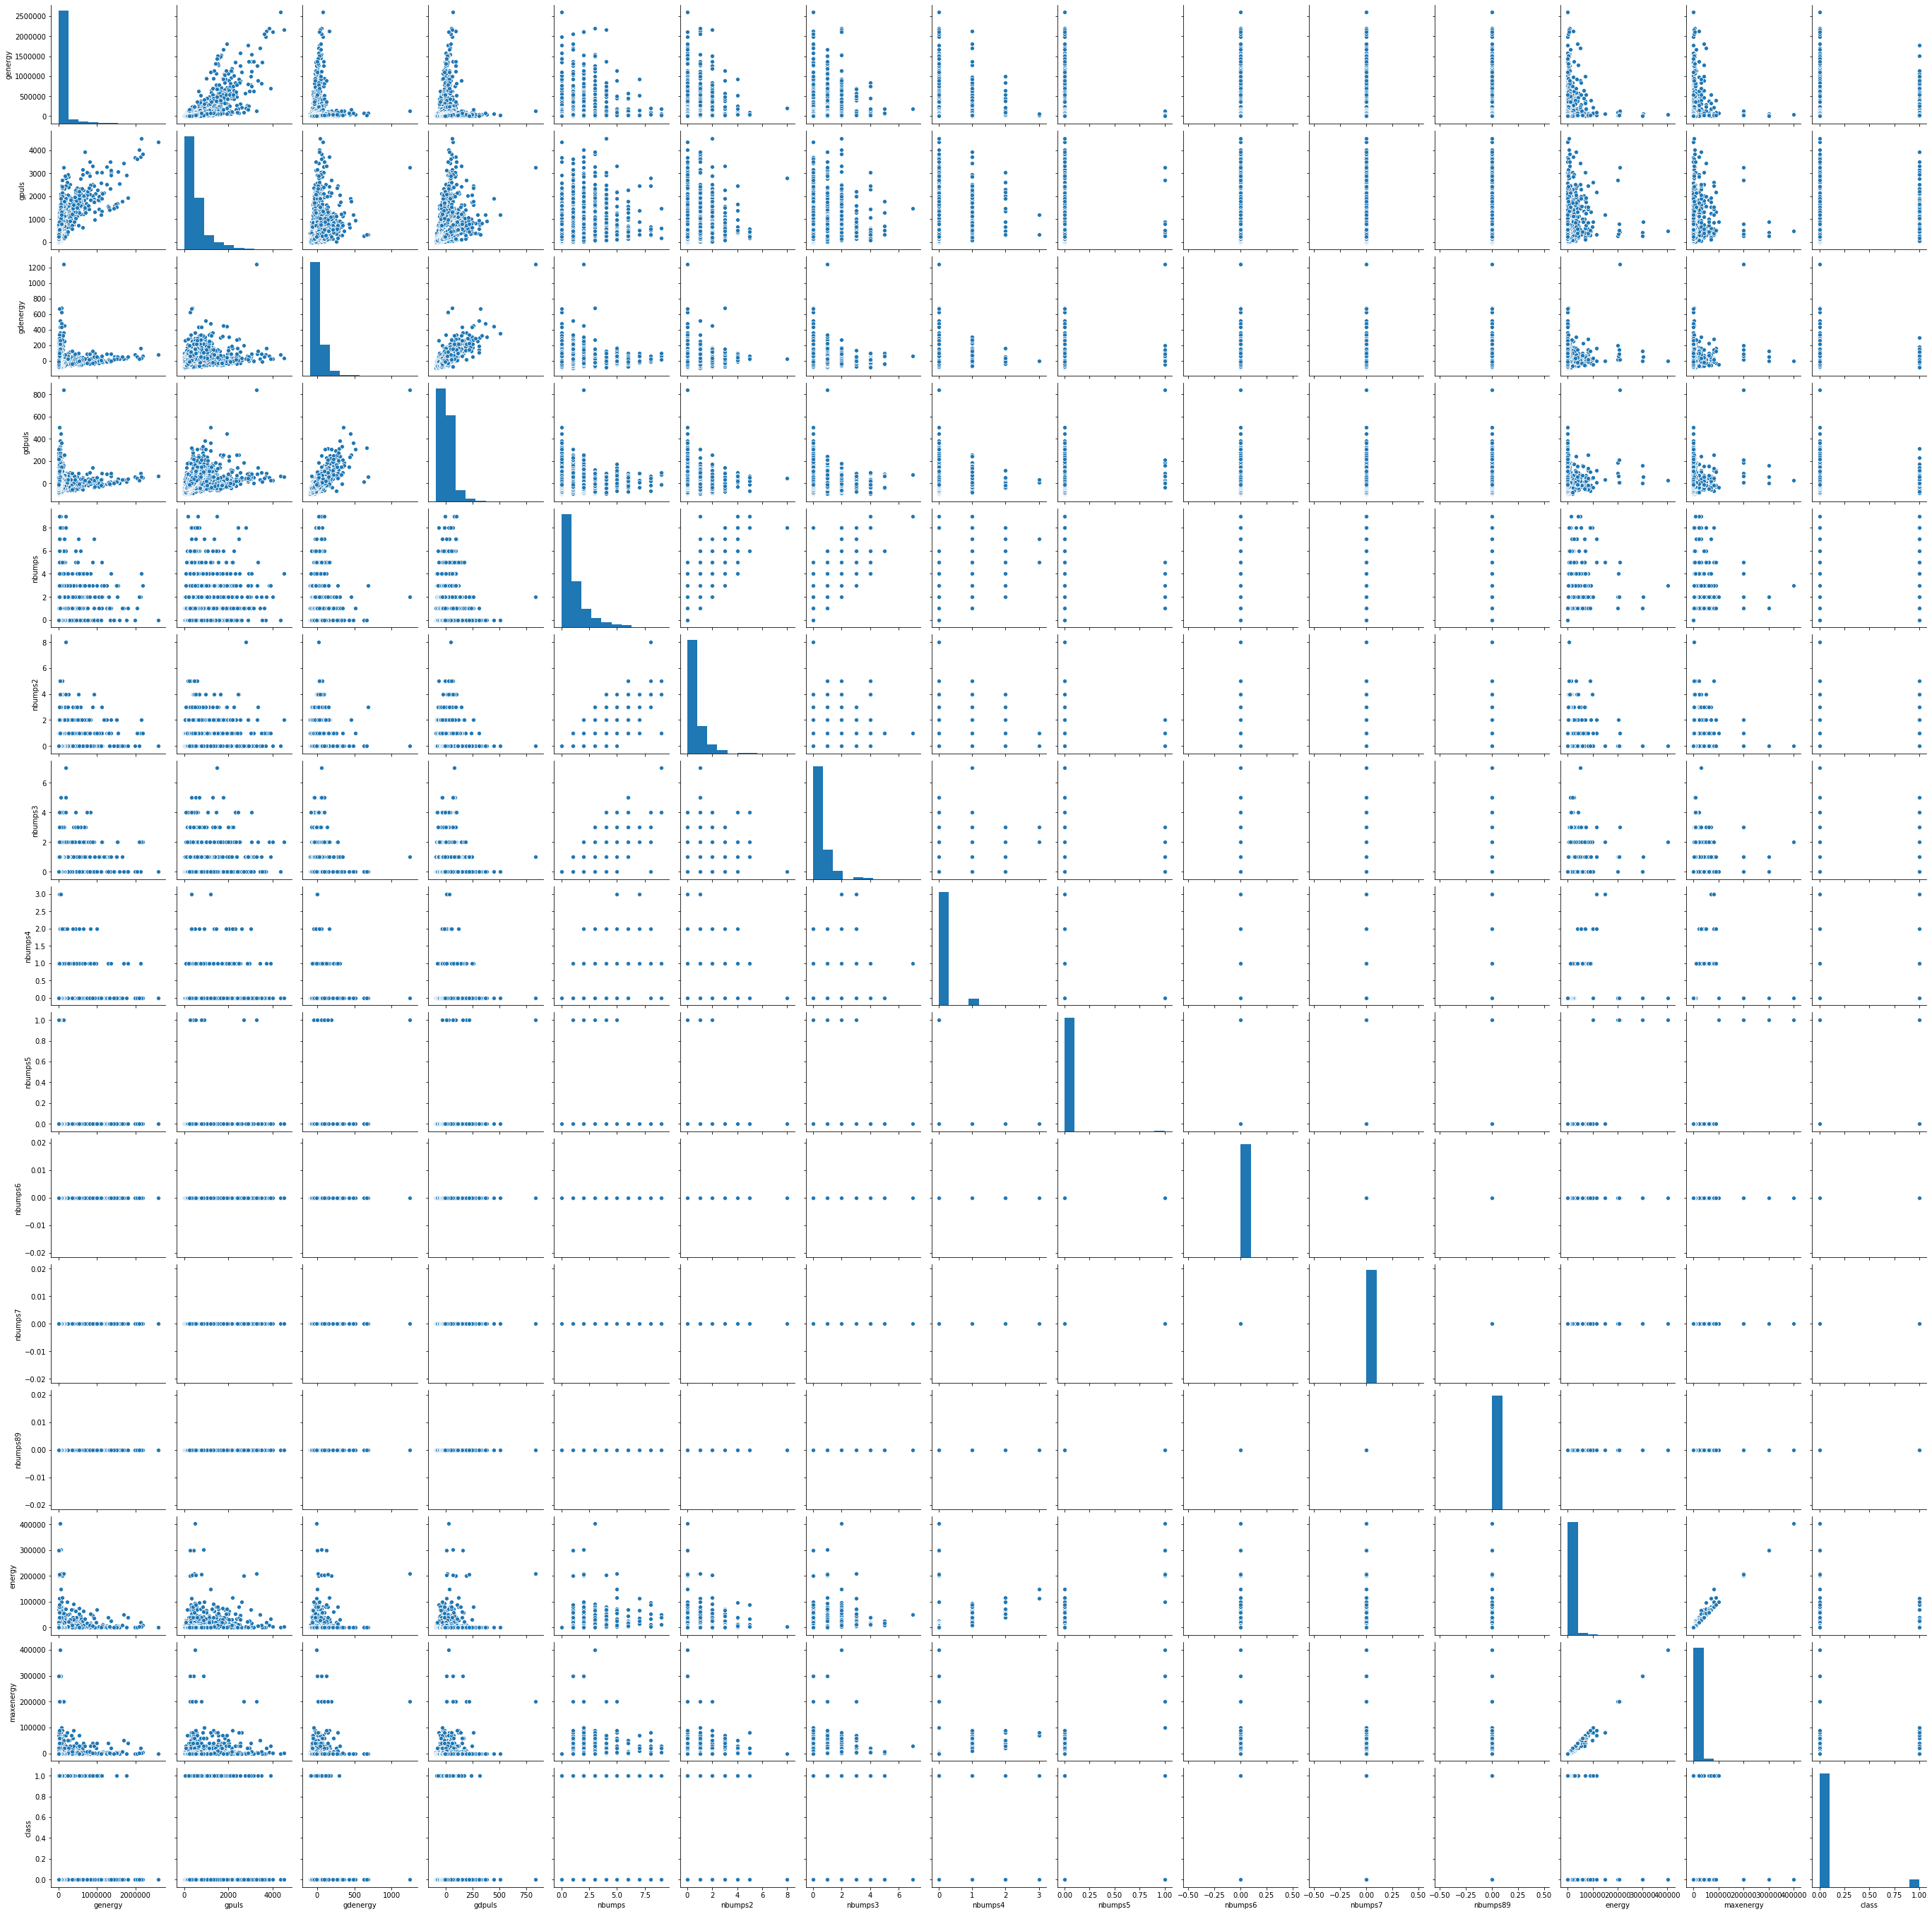

In [4]:
import seaborn as sea
sea.pairplot(df)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

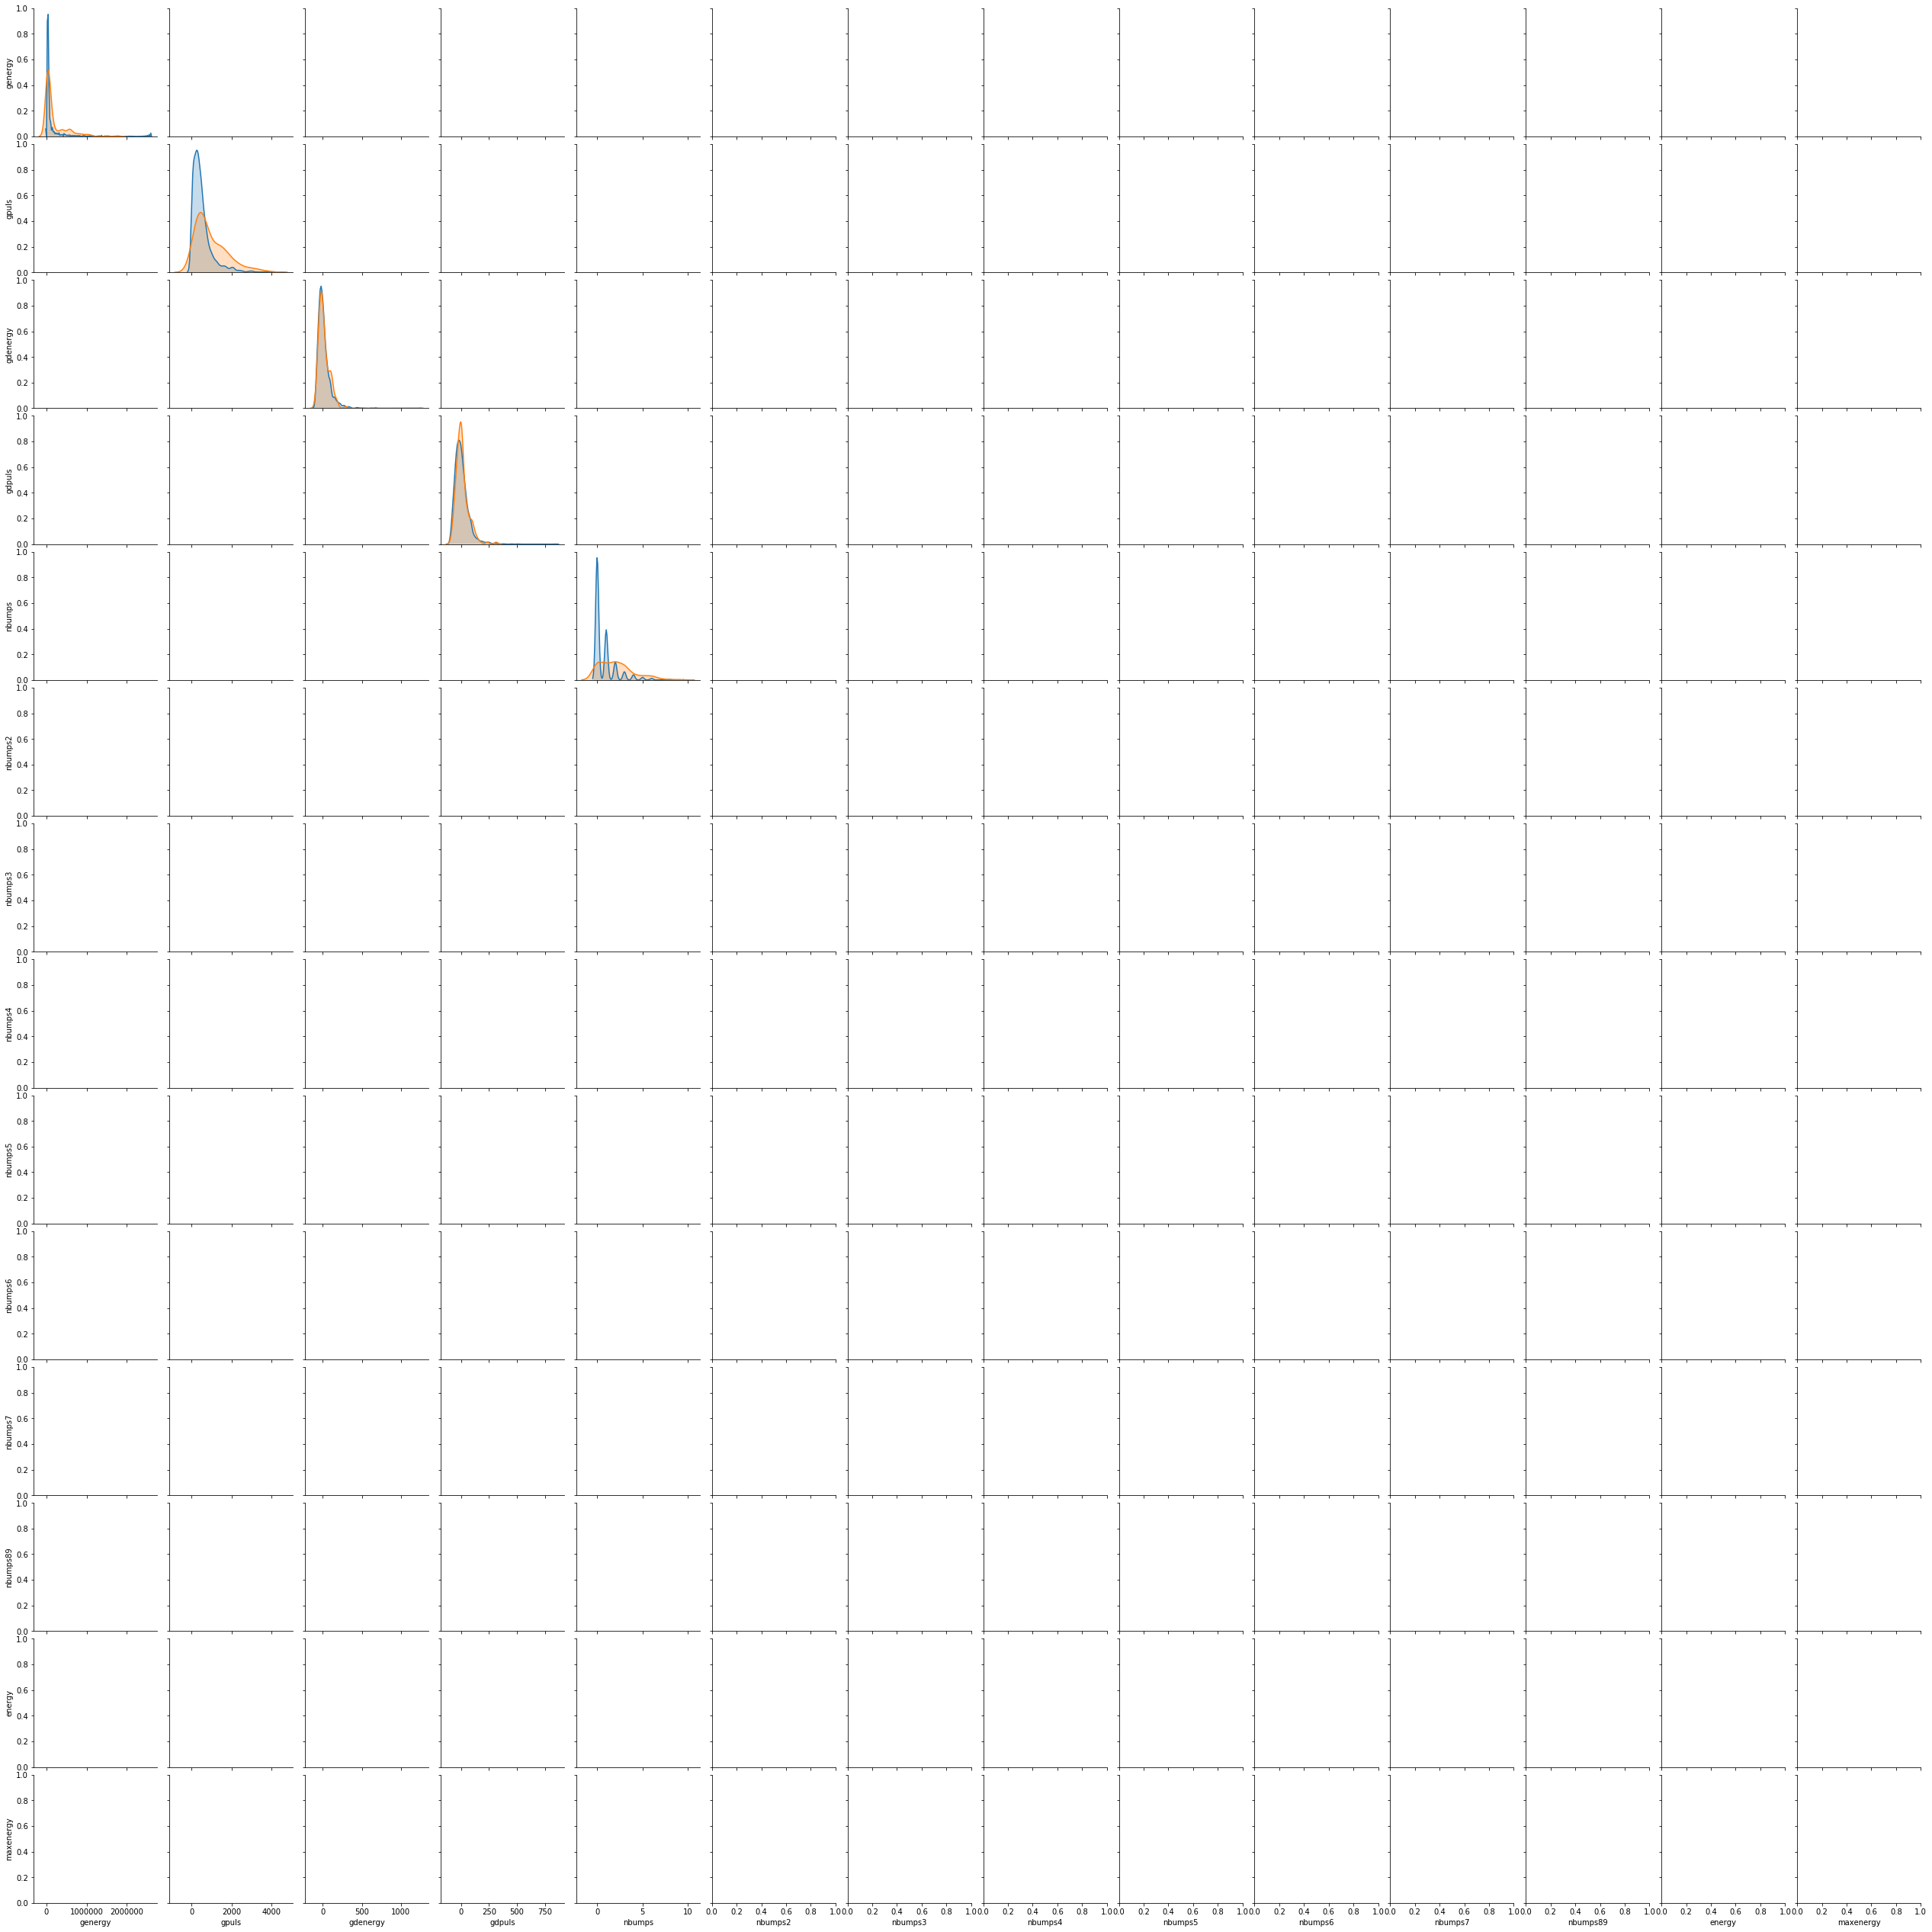

In [5]:
sea.pairplot(df,hue="class")

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["seismic"]=le.fit_transform(df["seismic"])
df["seismoacoustic"]=le.fit_transform(df["seismoacoustic"])
df["shift"]=le.fit_transform(df["shift"])
df["ghazard"]=le.fit_transform(df["ghazard"])

In [5]:
df.tail()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
2579,1,0,1,81410,785,432,151,1,0,0,0,0,0,0,0,0,0,0,0
2580,1,0,1,42110,555,213,118,0,0,0,0,0,0,0,0,0,0,0,0
2581,1,0,1,26960,540,101,112,0,0,0,0,0,0,0,0,0,0,0,0
2582,0,0,1,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,0,0
2583,0,0,1,12750,235,-10,-10,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
x=df.iloc[:,0:18].values
y=df.iloc[:,18:19].values

In [7]:
x.shape

(2584, 18)

In [8]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
p=one.fit_transform(x[:,0:1]).toarray()
q=one.fit_transform(x[:,1:2]).toarray()
x=np.delete(x,[0,1],axis=1)
x=np.concatenate((p,q,x),axis=1)

In [9]:
x.shape

(2584, 21)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection


In [55]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth = 2)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 = GaussianNB()
model6 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 42)

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)
model6.fit(x_train, y_train)

/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)
y_pred6 = model6.predict(x_test)

In [57]:
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTree = confusion_matrix(y_test, y_pred2)
cm_SupportVectorClass = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y_test, y_pred4)
cm_NaiveBayes = confusion_matrix(y_test, y_pred5)
cm_RandomForrest = confusion_matrix(y_test, y_pred6)

In [58]:
kfold = model_selection.KFold(n_splits=10, random_state = 0)
result1 = model_selection.cross_val_score(model1, x_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, x_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, x_train, y_train, cv=kfold)
result4 = model_selection.cross_val_score(model4, x_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(model5, x_train, y_train, cv=kfold)
result6 = model_selection.cross_val_score(model6, x_train, y_train, cv=kfold)

/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [59]:
print('Accuracy of Logistic Regression Model = ',result1.mean())
print('Accuracy of Decision Tree Model = ',result2.mean())
print('Accuracy of Support Vector Machine = ',result3.mean())
print('Accuracy of k-NN Model = ',result4.mean())
print('Accuracy of Naive Bayes Model = ',result5.mean())
print('Accuracy of Random Forest Model = ',result6.mean())

Accuracy of Logistic Regression Model =  0.9274189765958445
Accuracy of Decision Tree Model =  0.9308053093194502
Accuracy of Support Vector Machine =  0.9308053093194502
Accuracy of k-NN Model =  0.9288776323812205
Accuracy of Naive Bayes Model =  0.7733338023544861
Accuracy of Random Forest Model =  0.9303198724262464


In [63]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

#Defining 5 Logistic Regression Models
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))
model13 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic3', model13))
model14 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic4', model14))
model15 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model15))

#Defining 5 Decision Tree Classifiers
model21 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model21))
model22 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model22))
model23 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model23))
model24 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model24))
model25 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart5', model25))

#Defining 5 Support Vector Classifiers
model31 = SVC(kernel = 'linear')
estimators.append(('svm1', model31))
model32 = SVC(kernel = 'poly')
estimators.append(('svm2', model32))
model33 = SVC(kernel = 'rbf')
estimators.append(('svm3', model33))
model34 = SVC(kernel = 'rbf')
estimators.append(('svm4', model34))
model35 = SVC(kernel = 'linear')
estimators.append(('svm5', model35))

#Defining 5 K-NN classifiers
model41 = KNeighborsClassifier(metric = 'minkowski', p = 2)
estimators.append(('knn1', model41))
model42 = KNeighborsClassifier(metric = 'minkowski', p = 2)
estimators.append(('knn2', model42))
model43 = KNeighborsClassifier(metric = 'minkowski', p = 2)
estimators.append(('knn3', model43))
model44 = KNeighborsClassifier(metric = 'minkowski', p = 1)
estimators.append(('knn4', model44))
model45 = KNeighborsClassifier(metric = 'minkowski', p = 1)
estimators.append(('knn5', model45))

#Defining 5 Naive Bayes classifiers
model51 = GaussianNB()
estimators.append(('nbs1', model51))
model52 = GaussianNB()
estimators.append(('nbs2', model52))
model53 = GaussianNB()
estimators.append(('nbs3', model53))
model54 = GaussianNB()
estimators.append(('nbs4', model54))
model55 = GaussianNB()
estimators.append(('nbs5', model55))


#Defining 5 Random Forest classifiers
model61 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 42)
estimators.append(('rfc1', model61))
model62 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 42)
estimators.append(('rfc2', model62))
model63 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 42)
estimators.append(('rfc3', model63))
model64 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 42)
estimators.append(('rfc4', model64))
model65 = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 42)
estimators.append(('rfc5', model65))



# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

In [65]:
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
seed = 10
kfold = model_selection.KFold(n_splits=12, random_state=seed)
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)

/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harshan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d ar

0.9303249764753327


In [73]:
print("Final accuracy -",results.mean())

Final accuracy - 0.9303249764753327


In [79]:
import joblib
joblib.dump(ensemble,"seismic_pred.pkl")

['seismic_pred.pkl']